## Movie Recommendation System
## Date : 27/09/21

### What are Recommender Systems?
**Recommender system is refers to a system that is capable of predicting the future preference of a set of items for a particular user**


Recommendation metrics generally used are **purchase views**, **ratings** and **reviews**. Recommendation systems are very user specific generally.

### Types of Recommendation Systems
1. **Movie Recommendation** 
2. **Music Recommendation**
3. **eCommerce Product Recommendation**
4. **Restaurant Recommendation**


### Types of Recommender Systems
1. **Content Based Filtering** - This focuses on product similarity and then
recommends it to the user. 
Content based filtering is recommendation of similar products based on user purchase history.
In content based filtering, we use the **characteristic information** of the item such as **keywords**, **categories** and **titles** to predict the similar items. 

2. **Collaborative Filtering**  - This focuses on user behaviour 
similarity and then recommends it to other users. 
Collaborative filtering is recommendation of products based on similar user behaviour. 
Does not focus on the user purchase history but focuses on user behaviour or action.


### Objective : Given a particular movie as input, the system will be able to recommend the similar kind of movies to it, from the movie dataset

### Dataset Link
1. Dataset Name : Movie Lens Small Latest Dataset
2. Link : https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset

### Files are :
1. ratings.csv
2. movies.csv

## Create A Content Based Movie Recommender System

### Import required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load the ratings file

In [2]:
rf = pd.read_csv('ratings.csv')
rf.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Load the movies file

In [3]:
mf = pd.read_csv('movies.csv')
mf.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Merge the ratings file and movies file using movieid column

In [4]:
# merged both the datasets using movieId
md = pd.merge(rf,mf, on='movieId')
md.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
#look at the shape of the dataset
md.shape

(100836, 6)

In [6]:
# look at the columns in the dataset
md.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [7]:
# looking at basic statistic info of the dataset
md.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
# no null values in the dataset
md.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

### Find average ratings per movie

In [9]:
md.groupby('title')['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [10]:
# Highest movie rating and lower movie rating
md.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

### Find the count of ratings per movie

In [11]:
md.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

### Create a dataframe column with average ratings data per movie

In [12]:
ratings_average_count = pd.DataFrame(md.groupby('title')['rating'].mean())

In [13]:
ratings_average_count['rating_count'] = pd.DataFrame(md.groupby('title')['rating'].count())

In [14]:
ratings_average_count

,rating,rating_count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


### Find the distribution of the rating_count in the above dataframe

<AxesSubplot:>

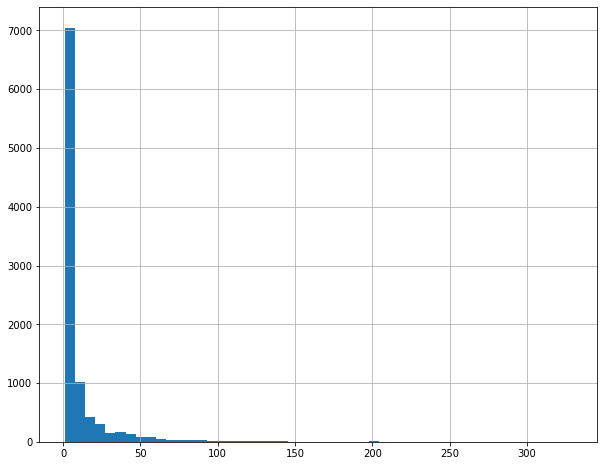

In [15]:
#univariate analysis
# rating_counts
plt.figure(figsize=(10,8))
ratings_average_count['rating_count'].hist(bins=50)

### Plot the distribution of ratings in the dataset

<AxesSubplot:>

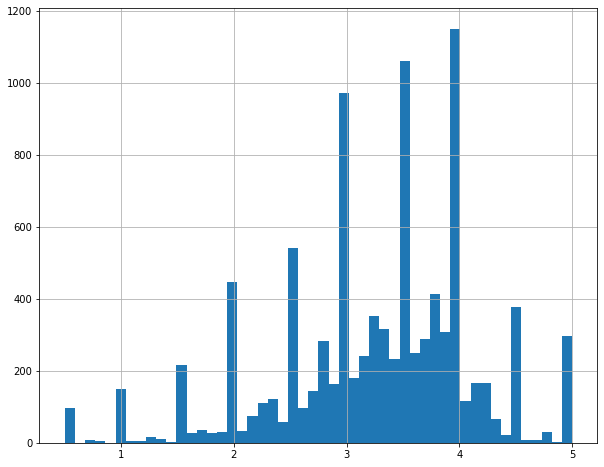

In [16]:
#univariate analysis
# rating
plt.figure(figsize=(10,8))
ratings_average_count['rating'].hist(bins=50)

### Draw a Jointplot of the Ratings values and count distributions

<Figure size 720x576 with 0 Axes>

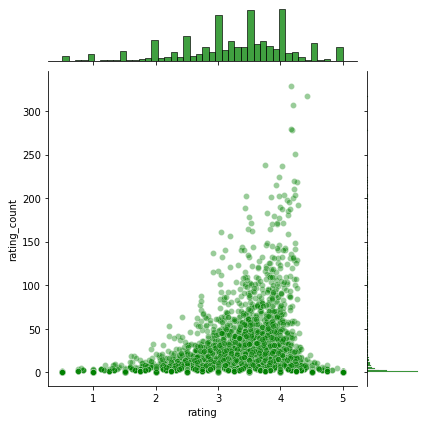

In [17]:
# bivariate analysis
# relation between rating and rating_count
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_count', color='green',data=ratings_average_count,alpha=0.4)

## Finding Similarity between the movies

1. We will use the correlation between the ratings of a movie as the similarity metric.
2. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie.
3. This matrix will have a lot of null values since every movie is not rated by every user.


### 1. create a pivot table (like a matrix created)
### create grouping using raw data

In [18]:
# columns are movie titles
# row index are the user id
# row values are the ratings of those movie titles
user_movie_rating = md.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


### 2. select a particular movie from the dataset

In [19]:
# This step is variable and can be changed as per user preference
user_movie_rating['Heat (1995)']

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    NaN
609    NaN
610    5.0
Name: Heat (1995), Length: 610, dtype: float64

In [20]:
# pulling out user ids who have given rating more than 3 to the film
user_movie_rating[user_movie_rating['Heat (1995)'] > 3]['Heat (1995)'] 

userId
1      4.0
6      4.0
11     5.0
18     4.0
23     4.0
      ... 
588    5.0
590    3.5
599    4.5
603    4.0
610    5.0
Name: Heat (1995), Length: 76, dtype: float64

### 3. Create a Series Object with the user ratings for Heat (1995)

In [21]:
heat_ratings = user_movie_rating['Heat (1995)']
heat_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    NaN
609    NaN
610    5.0
Name: Heat (1995), Length: 610, dtype: float64

## Find Out Movies Similar To "Heat (1995)"

### 4. we will be using the DataFrame.corrwith() function to find the pairwise correlation between the rows of the 'user_movie_rating' DataFrame with rows of the Series 'heat_ratings'

In [22]:
# Using corrwith() function
# Pairwise correlation is calculated here for a specific movie
similar_to_heat = user_movie_rating.corrwith(heat_ratings)

In [23]:
heat_corr = pd.DataFrame(similar_to_heat, columns=['Correlation'])
heat_corr.dropna(inplace=True)

In [24]:
heat_corr

,Correlation
title,
"'burbs, The (1989)",-0.144579
(500) Days of Summer (2009),-0.449467
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),0.166070
"10,000 BC (2008)",0.612112
...,...
[REC] (2007),0.755929
eXistenZ (1999),-0.157500
xXx (2002),-0.070244


### 5. Sort the dataframe values of the correlated values in descending order

In [25]:
# similar movies to heat (1995)
heat_corr.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Another 48 Hrs. (1990),1.0
Ghosts of Mississippi (1996),1.0
Escape to Witch Mountain (1975),1.0
Andre (1994),1.0
Bread and Tulips (Pane e tulipani) (2000),1.0
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0
Brassed Off (1996),1.0
Police Story (Ging chaat goo si) (1985),1.0
Music of the Heart (1999),1.0


### 6. Join the rating_average_count Dataframe to bring the rating_count per movie

In [26]:
# Joins by index
heat_corr = heat_corr.join(ratings_average_count['rating_count'])
heat_corr

,Correlation,rating_count
title,,
"'burbs, The (1989)",-0.144579,17
(500) Days of Summer (2009),-0.449467,42
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),0.166070,54
"10,000 BC (2008)",0.612112,17
...,...,...
[REC] (2007),0.755929,8
eXistenZ (1999),-0.157500,22
xXx (2002),-0.070244,24


### 7. Top 10 recommended movies to Heat (1995) as per correlation value and their rating count

In [27]:
heat_corr.sort_values(['Correlation','rating_count'], ascending=False).head(10)

,Correlation,rating_count
title,,
Heat (1995),1.0,102
Ever After: A Cinderella Story (1998),1.0,21
The Theory of Everything (2014),1.0,17
Spy (2015),1.0,16
Spellbound (2002),1.0,13
"Chronicles of Narnia: Prince Caspian, The (2008)",1.0,12
"Flintstones in Viva Rock Vegas, The (2000)",1.0,12
Harvey (1950),1.0,12
Hedwig and the Angry Inch (2000),1.0,11


### 8. Top 10 recommended movies to Heat (1995) as per only the pairwise correlation value 

In [28]:
# Final recommendation list of movies
heat_corr.sort_values(['Correlation'], ascending=False).head(10)

,Correlation,rating_count
title,,
Another 48 Hrs. (1990),1.0,5
Ghosts of Mississippi (1996),1.0,3
Escape to Witch Mountain (1975),1.0,9
Andre (1994),1.0,4
Bread and Tulips (Pane e tulipani) (2000),1.0,3
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0,2
Brassed Off (1996),1.0,7
Police Story (Ging chaat goo si) (1985),1.0,2
Music of the Heart (1999),1.0,4
